#$Imports$

In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

#$Data$

In [2]:
data = pd.read_csv("winequalityN.csv")
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Converting `text` to `numerical data` i.e $type$.

In [3]:
wine_type = np.unique(data["type"])
wine_type

array(['red', 'white'], dtype=object)

In [4]:
wineType_labs = {'red':0,'white':1}

In [5]:
data["type"] = data["type"].map(wineType_labs)

In [6]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Let's now `check` for any `null values`.

In [7]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
data["fixed acidity"].fillna(np.mean(data["fixed acidity"]),inplace=True)
data["volatile acidity"].fillna(np.mean(data["volatile acidity"]),inplace=True)
data["citric acid"].fillna(np.mean(data["citric acid"]),inplace=True)
data["residual sugar"].fillna(np.mean(data["residual sugar"]),inplace=True)
data["chlorides"].fillna(np.mean(data["chlorides"]),inplace=True)
data["pH"].fillna(np.mean(data["pH"]),inplace=True)
data["sulphates"].fillna(np.mean(data["sulphates"]),inplace=True)

In [9]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#$Feature$ $Importance$

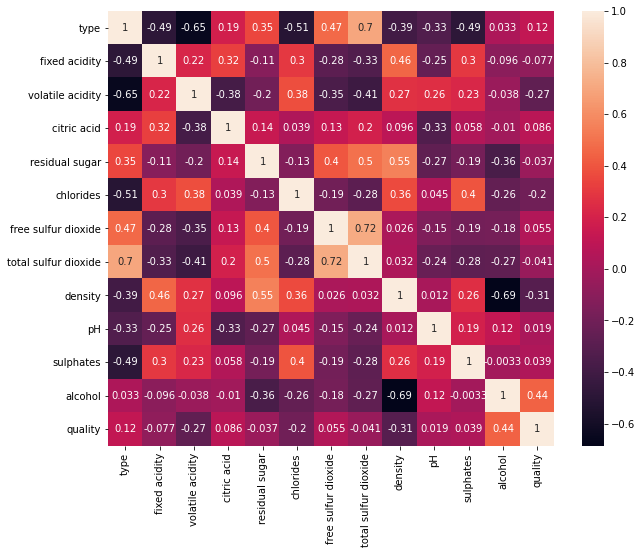

In [11]:
data_corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(data_corr,annot=True)
plt.show()

`Alcohol` and `Density` has a `strong -ve relation`, I count strong relations as above 0.6 and below -0.6. There are many other strong relations as well, but I liked this one.

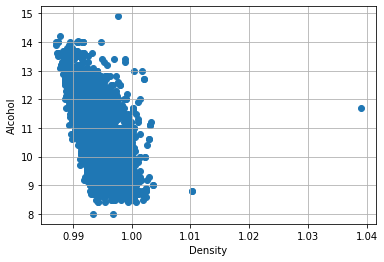

In [12]:
plt.scatter(data["density"],data["alcohol"])
plt.xlabel("Density")
plt.ylabel("Alcohol")
plt.grid()
plt.show()

In [13]:
Y_data = data.pop("quality")
X_data = data

In [14]:
from sklearn.ensemble import RandomForestRegressor as RFC
rfc = RFC()
rfc.fit(X_data,Y_data)
feature_imp = rfc.feature_importances_

In [15]:
cols = data.columns

In [16]:
cols

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [17]:
feature_imp 

array([0.00130987, 0.05667164, 0.12779979, 0.05880232, 0.0693381 ,
       0.06459661, 0.08930487, 0.07370016, 0.0607118 , 0.06647378,
       0.07817282, 0.25311823])

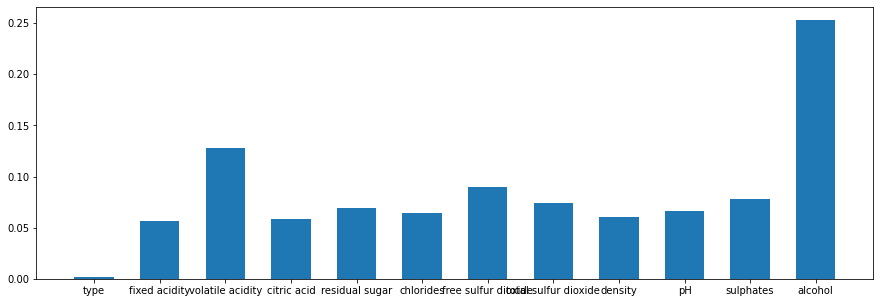

In [18]:
plt.figure(figsize=(15,5))
plt.bar(cols,feature_imp,width=0.6)
plt.show()

We can `drop` the `type` feature as it does not hold much importance with `quality`

In [19]:
data.pop("type")

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: type, Length: 6497, dtype: int64

In [20]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [21]:
X_data = data

#$Scalling$ and $Spliting$

In [22]:
sc = StandardScaler()
X_data = sc.fit_transform(X_data)

In [23]:
X_data[:5]

array([[-0.1671586 , -0.4235636 ,  0.28424515,  3.20697708, -0.31522185,
         0.81556531,  0.9599756 ,  2.10221365, -1.35966451, -0.5459591 ,
        -1.41855821],
       [-0.70742728, -0.24123152,  0.14652315, -0.8081365 , -0.20102728,
        -0.93110705,  0.28761754, -0.23233192,  0.50804501, -0.27706392,
        -0.83161516],
       [ 0.68183504, -0.36278624,  0.55968916,  0.30600496, -0.17247863,
        -0.02959874, -0.33165963,  0.13452524,  0.25901707, -0.6131829 ,
        -0.32852111],
       [-0.01279612, -0.66667305,  0.00880114,  0.64234956,  0.05591051,
         0.92825385,  1.24307374,  0.3012785 , -0.17678182, -0.88207808,
        -0.49621913],
       [-0.01279612, -0.66667305,  0.00880114,  0.64234956,  0.05591051,
         0.92825385,  1.24307374,  0.3012785 , -0.17678182, -0.88207808,
        -0.49621913]])

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data,Y_data,test_size=0.3)

#$Models$

In [25]:
LR = LinearRegression()
LR.fit(X_train,Y_train)
y_pred = LR.predict(X_test)
r2_LR = r2_score(Y_test,y_pred)
RMSE_LR = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f"R2 : {r2_LR} RMSE : {RMSE_LR}")

R2 : 0.29874173684250593 RMSE : 0.7249712684408343


In [26]:
RFR = RandomForestRegressor(n_estimators=100,max_depth=10,min_samples_leaf=1,n_jobs=-1,oob_score=True)
RFR.fit(X_train,Y_train)
y_pred = RFR.predict(X_test)
r2_RFR = r2_score(Y_test,y_pred)
RMSE_RFR = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f"R2 : {r2_RFR} RMSE : {RMSE_RFR} OOB : {RFR.oob_score_}")

R2 : 0.4662293108835379 RMSE : 0.6324980053599744 OOB : 0.4294434635105474


In [27]:
DTR = DecisionTreeRegressor(max_depth=10,min_samples_leaf=10)  # I don't think it will be able to out perform RFR
DTR.fit(X_train,Y_train)
y_pred = DTR.predict(X_test)
r2_DTR = r2_score(Y_test,y_pred)
RMSE_DTR = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f"R2 : {r2_DTR} RMSE : {RMSE_DTR}")

R2 : 0.2806462176742577 RMSE : 0.7342654020530228


In [28]:
ABR = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=100,learning_rate=0.5,random_state=42)
ABR.fit(X_train,Y_train)
y_pred = ABR.predict(X_test)
r2_ABR = r2_score(Y_test,y_pred)
RMSE_ABR = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f"R2 : {r2_ABR} RMSE : {RMSE_ABR}")

R2 : 0.4457741109314959 RMSE : 0.6445033866354896


In [48]:
svr = SVR(kernel="rbf",degree=3,C=3)
svr.fit(X_train,Y_train)
y_pred = svr.predict(X_test)
r2_svr = r2_score(Y_test,y_pred)
RMSE_svr = np.sqrt(mean_squared_error(Y_test,y_pred))
print(f"R2 : {r2_svr} RMSE : {RMSE_svr}")

R2 : 0.4209832168660197 RMSE : 0.6587602345134332


#$Best$ $Model$ $Visulization$

In [50]:
models = ["LR","RFR","DTR","ABR","SVR"]
r2s = [r2_LR,r2_RFR,r2_DTR,r2_ABR,r2_svr]
rmses = [RMSE_LR,RMSE_RFR,RMSE_DTR,RMSE_ABR,RMSE_svr]
max_r2 = np.max(r2s)
min_r2 = np.min(r2s)
max_RMSE = np.max(rmses)
min_RMSE = np.min(rmses)

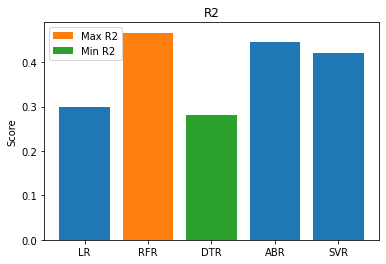

In [51]:
plt.bar(models,r2s)
plt.bar(models[r2s.index([max_r2])],max_r2,label="Max R2")
plt.bar(models[r2s.index([min_r2])],min_r2,label="Min R2")
plt.legend()
plt.title("R2")
plt.ylabel("Score")
plt.show()

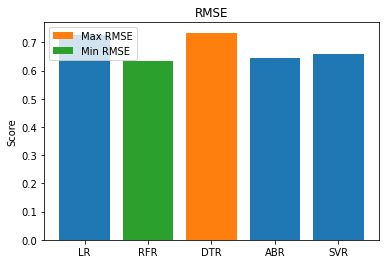

In [52]:
plt.bar(models,rmses)
plt.bar(models[rmses.index([max_RMSE])],max_RMSE,label="Max RMSE")
plt.bar(models[rmses.index([min_RMSE])],min_RMSE,label="Min RMSE")
plt.title("RMSE")
plt.legend()
plt.ylabel("Score")
plt.show()

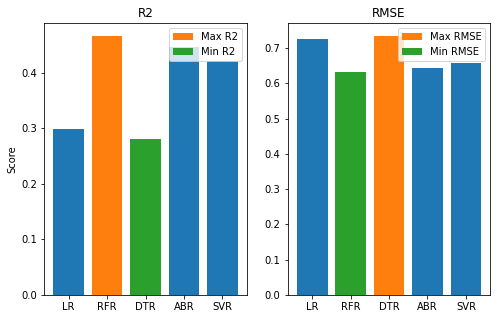

In [53]:
f, (ax1,ax2) = plt.subplots(1,2)
f.set_figheight(5)
f.set_figwidth(8)

ax1.bar(models,r2s)
ax1.bar(models[r2s.index([max_r2])],max_r2,label="Max R2")
ax1.bar(models[r2s.index([min_r2])],min_r2,label="Min R2")
ax1.set_title("R2")
ax1.set_ylabel("Score")
ax1.legend()


ax2.bar(models,rmses)
ax2.set_title("RMSE")
ax2.bar(models[rmses.index([max_RMSE])],max_RMSE,label="Max RMSE")
ax2.bar(models[rmses.index([min_RMSE])],min_RMSE,label="Min RMSE")
ax2.legend()


plt.show()